In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = 'C:\\Users\\reill\\Downloads\\Traffic_Crashes_-_Crashes.csv'
df = pd.DataFrame(pd.read_csv(file))

In [3]:
#Drop high NaN count columns
dropcols = []
for col in df:
    if (df[col].isna().sum() / len(df[col])) > 0.6:
        dropcols.append(col)
df.drop(dropcols, axis='columns', inplace=True)

In [4]:
#Drop unnecessary columns
df.drop(['CRASH_RECORD_ID', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'LOCATION'], axis='columns', inplace=True)

In [5]:
df.replace('UNKNOWN', np.nan, inplace=True)

In [6]:
df = df.dropna(axis='index').reset_index(drop=True)

In [7]:
categorical = ['TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY']
#Removed street name and direction

In [8]:
numerical = ['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE']

#This leaves out the datetime column

In [9]:
from datetime import datetime

In [10]:
#Convert the string dates into datetime objects
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [12]:
scaler = StandardScaler()
scaled_df = df
scaled_df[numerical] = scaler.fit_transform(scaled_df[numerical])
scaled_df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,2023-07-29 14:45:00,0.252263,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,-0.879539,0.0,0.155627,1.457387,0.062053,0.001778,0.010912
1,2023-08-13 10:10:00,0.252263,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,1.675504,0.0,-0.572321,-1.586060,0.357042,0.355384,-0.050762
2,2023-08-09 19:55:00,0.252263,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,-0.124587,11.284647,-0.19697,-1.731220,0.0,1.065562,-0.064337,0.357042,-0.276717,0.067092
3,2023-09-06 18:45:00,0.252263,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,-0.027858,0.0,0.883575,-0.064337,0.652031,0.198169,0.014718
4,2023-07-30 18:09:00,0.252263,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,-0.027858,0.0,0.883575,-1.586060,0.062053,0.116960,-0.055930


In [13]:
scaled_df = pd.get_dummies(scaled_df)

In [14]:
scaled_df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,STREET_NAME_YALE AVE G,STREET_NAME_YATES AVE,STREET_NAME_YATES BLVD,STREET_NAME_YOUNG PKWY,STREET_NAME_ZEMKE RD,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,2023-07-29 14:45:00,0.252263,-0.558426,0.003337,4.230774,-0.345416,-0.032774,-0.124587,-0.261886,-0.19697,...,0,0,0,0,0,0,0,1,0,0
1,2023-08-13 10:10:00,0.252263,-0.168305,0.684181,2.072307,-0.345416,-0.032774,-0.124587,-0.261886,-0.19697,...,0,0,0,0,0,0,0,1,0,0
2,2023-08-09 19:55:00,0.252263,1.326043,-0.716045,-0.086160,8.271825,-0.032774,-0.124587,11.284647,-0.19697,...,0,0,0,0,0,0,0,0,1,0
3,2023-09-06 18:45:00,0.252263,-0.805022,0.825488,-0.086160,-0.345416,-0.032774,-0.124587,-0.261886,-0.19697,...,0,0,0,0,0,0,0,1,0,0
4,2023-07-30 18:09:00,0.252263,-0.088804,-0.159381,2.072307,-0.345416,-0.032774,-0.124587,-0.261886,-0.19697,...,0,0,0,0,0,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
mini = scaled_df.sample(60000, axis='index')

x = mini.drop(['CRASH_DATE', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN'], axis='columns')
y = mini['INJURIES_FATAL']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=300)
pca.fit(x)

PCA(n_components=300)

In [20]:
newd = pd.DataFrame(pca.transform(x))

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

x = newd

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

forest_fatal = RandomForestRegressor(n_jobs=16)
forest_fatal.fit(x_train, y_train)

y_pred = forest_fatal.predict(x_test)
r2_score(y_test, y_pred)

0.9955362802335279

In [22]:
df['PRIM_CONTRIBUTORY_CAUSE'].unique()

array(['FAILING TO REDUCE SPEED TO AVOID CRASH', 'UNABLE TO DETERMINE',
       'IMPROPER LANE USAGE', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'IMPROPER OVERTAKING/PASSING', 'IMPROPER BACKING',
       'FAILING TO YIELD RIGHT-OF-WAY', 'WEATHER',
       'IMPROPER TURNING/NO SIGNAL', 'DRIVING ON WRONG SIDE/WRONG WAY',
       'NOT APPLICABLE', 'FOLLOWING TOO CLOSELY',
       'DISTRACTION - FROM INSIDE VEHICLE', 'ANIMAL',
       'DISREGARDING TRAFFIC SIGNALS',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'TEXTING',
       'EQUIPMENT - VEHICLE CONDITION', 'DISREGARDING STOP SIGN',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DISREGARDING YIELD SIGN', 'PHYSICAL CONDITION OF DRIVER',
       'ROAD CONSTRUCTION/MAINTENANCE',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'EXCEEDING AUTHORIZED S

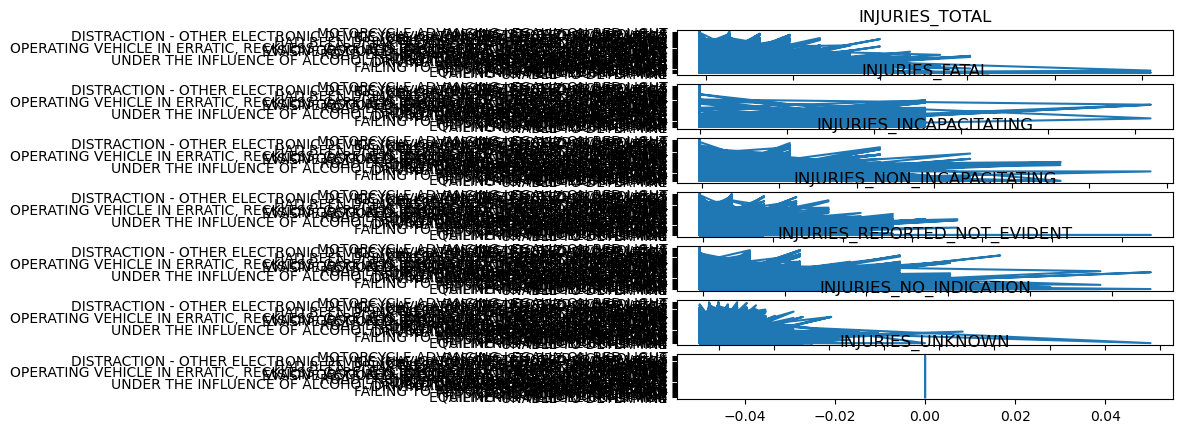

In [23]:
injury = ['INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN']

temp = df[['INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'PRIM_CONTRIBUTORY_CAUSE']].sample(60000, axis='index')

fig, axs = plt.subplots(7)
for i in range(len(injury)):
    axs[i].plot(temp[injury[i]], temp['PRIM_CONTRIBUTORY_CAUSE'])
    axs[i].set_title(injury[i])

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
newmini = df.sample(60000, axis='index')
y = newmini['PRIM_CONTRIBUTORY_CAUSE']
newmini[numerical] = scaler.fit_transform(newmini[numerical])
newmini = pd.get_dummies(newmini.drop(['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], axis='columns'))
x = newmini.drop(['CRASH_DATE'], axis='columns')

In [26]:
pca2 = PCA(n_components=300)
pca2.fit(x)
newx = pd.DataFrame(pca2.transform(x))

x_train, x_test, y_train, y_test = train_test_split(newx, y, test_size=0.2)

In [27]:
forest_cause = RandomForestClassifier(n_jobs=16)
forest_cause.fit(x_train, y_train)

RandomForestClassifier(n_jobs=16)

In [28]:
y_pred = forest_cause.predict(x_test)
accuracy_score(y_test, y_pred)

0.3929166666666667

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
#took way way way too long to run

#svc = SVC()
#cross = GridSearchCV(svc, {'C':[1, 3, 5, 7], 'gamma':['scale', 'auto']}, scoring=accuracy_score, n_jobs=16)
#cross.fit(x_train, y_train)

C:\Users\reill\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [31]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [32]:
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.41075